# Creating Cleaned and Merged CSV

In [2]:
#imports for project
import pandas as pd
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st
from scipy import stats

In [3]:
# Loading in Olympic data
olympics_path = "datasources/athlete_events.csv"
noc_path = "datasources/noc_regions.csv"
census_path = "datasources/internationalcensus.csv"
gdp_path = "datasources/internationalgdp.csv"

# Read the cleaned olympic data in cleandata folder

olympics_df = pd.read_csv(olympics_path)

# Read the country data in the NOC file located in datasources folder
noc_df = pd.read_csv(noc_path)

# Read the census data and rename column for smooth merge
census_df = pd.read_csv(census_path)
census_df = census_df.rename(columns ={"Country/Area Name":"region"})

# Read the gdp data, rename column for smooth merge, drop unnecessary columns, melt for ease of merge, change Year column to integer
gdp_df = pd.read_csv(gdp_path)
gdp_df= gdp_df.rename(columns ={"Country Name":"region"})
gdp_df = gdp_df.drop(["Country Code","Indicator Name","Indicator Code"], axis=1)
gdp_df = pd.melt(gdp_df,'region',var_name='Year',value_name='GDP')
gdp_df["Year"]=gdp_df["Year"].astype(int)

In [4]:
# merge clean_df and noc_regions by NOC
merge_df = pd.merge(olympics_df, noc_df, on="NOC", how= "inner")

# merge merge_df and international census data by country and year
merge2_df = pd.merge(merge_df, census_df, on=["region","Year"], how = "inner")

# merge merge2_df and gdp data by country and year

merge3_df = pd.merge(merge2_df, gdp_df, on=["region","Year"], how = "inner")

# Removing columns notes, Annual Growth Rate %, Density (per sq km),Total Fertility Rate, Life Expectancy at Birth, Under-5 Mortality Rate
olympiccountries_df = merge3_df.drop(["notes","Annual Growth Rate %", "Density (per sq km)","Total Fertility Rate", "Life Expectancy at Birth", "Under-5 Mortality Rate"], axis=1)
olympiccountries_df.head(10)
olympiccountries_df.set_index("ID")

olympiccountries_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,Row,FIPS,GENC,Population,Area (sq km),GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,...,Boxing,Boxing Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,...,Athletics,Athletics Men's Hammer Throw,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,...,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,6234,CH,CN,1182230625,9326410,4.270000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207558,87277,Frans Ntaole,M,33.0,168.0,62.0,Lesotho,LES,1984 Summer,1984,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207559,98490,Gabashane Vincent Rakabaele,M,35.0,163.0,54.0,Lesotho,LES,1984 Summer,1984,...,Athletics,Athletics Men's Marathon,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207560,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,...,Boxing,Boxing Men's Welterweight,NaN,Lesotho,17400,LT,LS,1519492,30355,3.331585e+08
207561,81698,Motsapi Moorosi,M,27.0,170.0,62.0,Lesotho,LES,1972 Summer,1972,...,Athletics,Athletics Men's 100 metres,NaN,Lesotho,17388,LT,LS,1116779,30355,8.091583e+07


In [5]:
olympiccountries_df.to_csv("cleandata/clean_df.csv")

# Country Analysis

In [6]:
#create dataframe for country analysis
country_df = olympiccountries_df[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games','Year', 'Season', 'City', 'Sport', 'Event', 'Medal', "region"]]
country_df["Medal"] = country_df["Medal"].fillna("No Medal")

C:\Users\steve\anaconda3\envs\pythondata\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
#pivot medals and make medal calculations
medals = pd.DataFrame({
    "Medals" : country_df["Medal"]
})

medals = pd.get_dummies(medals)
country_df["Bronze"] = medals["Medals_Bronze"]
country_df["Silver"] = medals["Medals_Silver"]
country_df["Gold"] = medals["Medals_Gold"]
country_df["No Win"] = medals["Medals_No Medal"]
country_df["Attempts"] = country_df["Bronze"] + country_df["Silver"] + country_df["Gold"] + country_df["No Win"]
country_df["Wins"] = country_df["Bronze"] + country_df["Silver"] + country_df["Gold"]

In [8]:
# grouping by team, games, sport, event, and country

team_group = country_df.groupby(by = ["Team", "Games", "Sport", "Event", "region"], as_index= False).agg({
    "Attempts" : "max",
    "Wins" : "max",
    "Bronze" : "max",
    "Silver" : "max",
    "Gold" : "max",
})

In [9]:
# grouping by country
country_group = team_group.groupby(by = "region", as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
country_group["Win Rate"] = country_group["Wins"] / country_group["Attempts"]

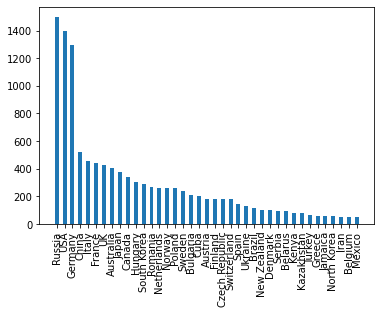

In [33]:
#countries with over 50 medals. Sorted in descending order.

country_group1 = country_group
country_group1 = country_group1.loc[country_group["Wins"]>= 50]
country_group1 = country_group1.sort_values("Wins", ascending= False)
plt.bar(country_group1["region"], country_group1["Wins"], width = .5, align = "center")
plt.xticks(rotation='vertical')
plt.show()

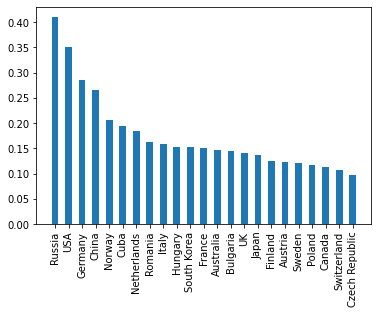

In [11]:
#countries with the highest win rates sorted in descending order

country_group1 = country_group
country_group1 = country_group1.loc[country_group["Wins"]>= 150]
country_group1 = country_group1.sort_values("Win Rate", ascending= False)
plt.bar(country_group1["region"], country_group1["Win Rate"], width = .5, align = "center")
plt.xticks(rotation='vertical')
plt.show()

In [12]:
#table of top 10 countries win rate

country_group = country_group.sort_values("Win Rate", ascending = False)
country_group.head(10)

,region,Attempts,Wins,Bronze,Silver,Gold,Win Rate
150,Russia,3654.0,1498.0,529.0,535.0,661.0,0.409962
190,USA,3997.0,1400.0,482.0,545.0,658.0,0.350263
66,Germany,4521.0,1293.0,482.0,478.0,485.0,0.285999
39,China,1955.0,518.0,172.0,184.0,239.0,0.264962
59,Ethiopia,164.0,42.0,22.0,9.0,22.0,0.256098
92,Kenya,344.0,79.0,31.0,38.0,31.0,0.229651
134,Norway,1272.0,262.0,90.0,103.0,103.0,0.205975
44,Cuba,1059.0,205.0,70.0,65.0,72.0,0.193579
128,Netherlands,1431.0,263.0,105.0,100.0,95.0,0.183788
12,Azerbaijan,261.0,44.0,25.0,12.0,7.0,0.168582


In [13]:
#grouping by country and sport to see top 10 highest wins

country_sports = country_df.groupby(by = ["region", "Sport"], as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
country_sports["Win Rate"] = country_sports["Wins"] / country_sports["Attempts"]
country_sports = country_sports.sort_values("Wins", ascending= False)
country_sports.head(10)

,region,Sport,Attempts,Wins,Bronze,Silver,Gold,Win Rate
3274,USA,Swimming,1254.0,875.0,129,195,551.0,0.697767
3236,USA,Athletics,1747.0,530.0,97,150,283.0,0.303377
1187,Germany,Rowing,749.0,393.0,75,78,240.0,0.524700
178,Australia,Swimming,1099.0,346.0,112,140,94.0,0.314832
2567,Russia,Athletics,1346.0,329.0,104,108,117.0,0.244428
1195,Germany,Swimming,1239.0,325.0,140,117,68.0,0.262308
2585,Russia,Gymnastics,1075.0,318.0,68,118,132.0,0.295814
3239,USA,Basketball,287.0,287.0,36,24,227.0,1.000000
1160,Germany,Athletics,1516.0,282.0,102,96,84.0,0.186016
559,Canada,Ice Hockey,368.0,247.0,18,80,149.0,0.671196


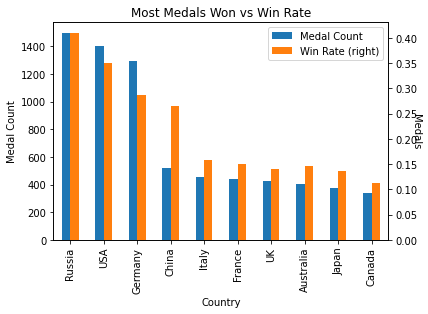

In [14]:
#bar chart illustrates the win rate and medal count side by saide by top 10 medal counts

bar_chart = country_group[["region", "Wins", "Win Rate"]]
bar_chart = bar_chart.set_index("region")
bar_chart = bar_chart.nlargest(10, "Wins")
bar_chart = bar_chart.rename(columns={"Wins":"Medal Count", "region":"Country"})
bar_chart = bar_chart.sort_values("Medal Count", ascending=False)
medalsbar = bar_chart.plot(kind="bar", secondary_y = "Win Rate", title=("Most Medals Won vs Win Rate"))
medalsbar.set_ylabel("Medal Count")
medalsbar.set_xlabel("Country")
medalsbar.right_ax.set_ylabel("Medals",rotation = -90)
plt.show()

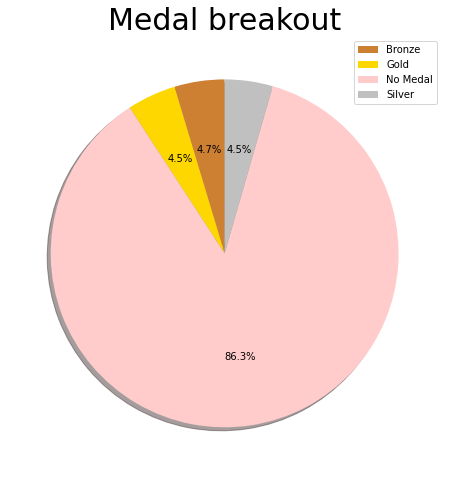

In [15]:
# illustration of percentage medal distribution


pie_df = country_df.groupby("Medal").agg({"ID":"count"})
colors= ['#cd7f32','gold', "#ffcccb", "silver"]
piechart = pie_df.plot.pie(y = "ID", labels = None, autopct='%1.1f%%',colors=colors,startangle=90,shadow=True, figsize=(12,8))
piechart.set_ylabel("")
plt.title("Medal breakout", fontsize=30)
plt.savefig("outputs/medalbreakout.png")

# Athlete Review

In [16]:
#grouping by athlete and sport 
athletes = country_df.groupby(["Name", "Sport"],as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
}).sort_values(by = "Wins", ascending= False)
try:
    athletes["Win Rate"] = athletes["Wins"] / athletes["Attempts"]
except:
    0
    
athletes.head(10)

,Name,Sport,Attempts,Wins,Bronze,Silver,Gold,Win Rate
64757,"Michael Fred Phelps, II",Swimming,30,28,2,3,23,0.933333
70851,Nikolay Yefimovich Andrianov,Gymnastics,24,15,3,5,7,0.625000
71912,Ole Einar Bjrndalen,Biathlon,26,13,1,4,8,0.500000
3035,Aleksey Yuryevich Nemov,Gymnastics,21,12,6,2,4,0.571429
11764,Birgit Fischer-Schmidt,Canoeing,13,12,0,4,8,0.923077
19129,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,13,12,4,4,4,0.923077
42005,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,17,12,1,3,8,0.705882
84726,Sawao Kato,Gymnastics,24,12,1,3,8,0.500000
83080,Ryan Steven Lochte,Swimming,14,12,3,3,6,0.857143
53673,Larysa Semenivna Latynina (Diriy-),Gymnastics,12,12,3,4,5,1.000000


<Figure size 432x288 with 0 Axes>

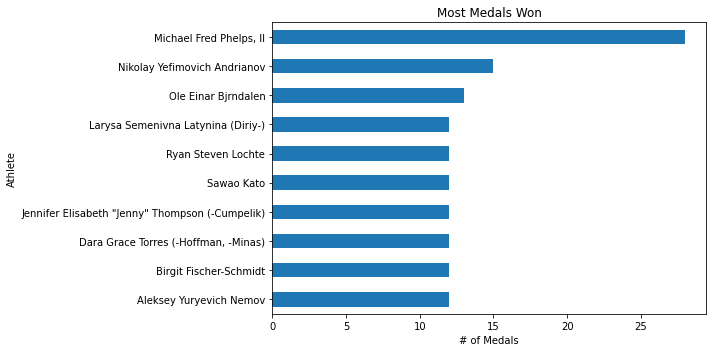

In [19]:
#horizontal bar chart to illustrate athlete with the most medals

plt.clf()
bar_chart_athlete = athletes[["Name", "Wins"]]
bar_chart_athlete = bar_chart_athlete.set_index("Name")
bar_chart_athlete = bar_chart_athlete.nlargest(10, "Wins")
bar_chart_athlete = bar_chart_athlete.rename(columns={"Wins":"Medal Count", "Name":"Athlete"})
bar_chart_athlete = bar_chart_athlete.sort_values("Medal Count", ascending=True)
medalsbar_athlete = bar_chart_athlete.plot(kind="barh", title=("Most Medals Won"), legend = False, figsize = (10,5))
medalsbar_athlete.set_ylabel("Athlete")
medalsbar_athlete.set_xlabel("# of Medals")
plt.tight_layout()
plt.savefig("outputs/Athlete_Bar.png")
plt.show()

In [20]:
#gender count of athletes
Gendercount=olympics_df["Sex"].value_counts()
Gendercount

M    196594
F     74522
Name: Sex, dtype: int64

In [21]:
#percentage of each gender
Athletescount=len(olympics_df)
Gendercountpercentage=round(Gendercount/Athletescount*100,2)
Gendercountpercentage

M    72.51
F    27.49
Name: Sex, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

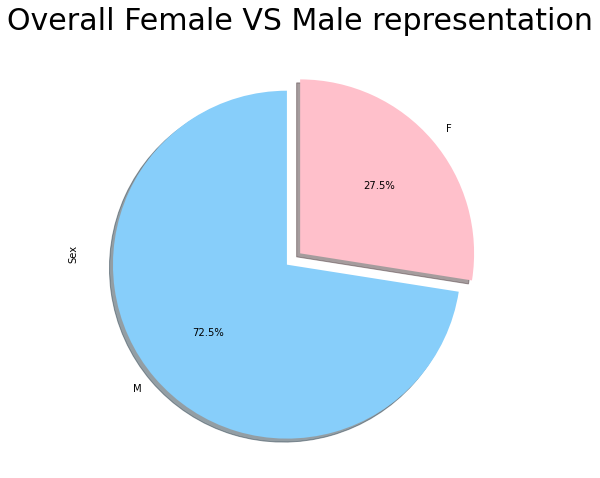

In [22]:
#pie chart illustrating gender balance

explode = (0.1, 0)
colors= ['lightskyblue','pink']
olympics_df.Sex.value_counts().plot(kind=("pie"),autopct='%1.1f%%', explode=explode,colors=colors,startangle=90,shadow=True, figsize=(12,8))
plt.title("Overall Female VS Male representation", fontsize=30)
plt.savefig('outputs/overall female vs male representation.png')
plt.show

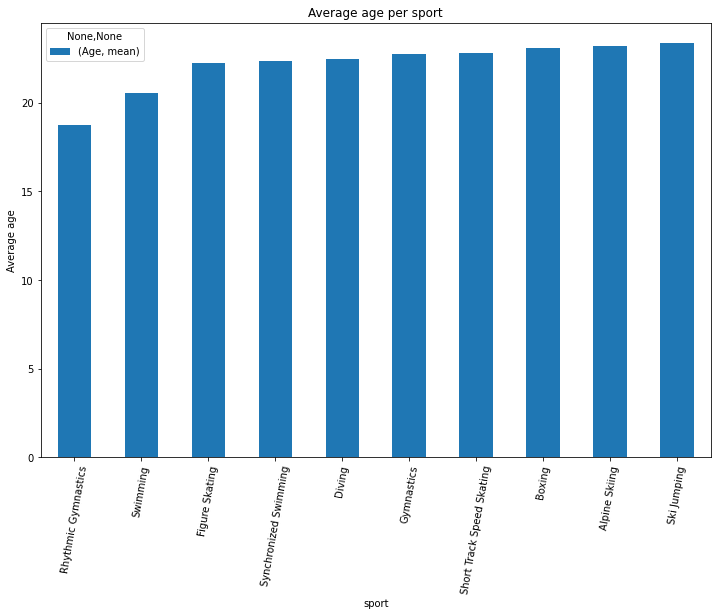

In [23]:
#Average age of athletes per sport

avg_age_per_sport=olympics_df.groupby(["Sport"]).agg({"Age":["mean"]}).sort_values(by=[('Age', 'mean')],ascending=True)
avg_age_per_sport.head(10).plot(kind="bar",figsize=(12,8))
plt.xticks(rotation=80)
plt.title("Average age per sport")
plt.xlabel("sport")
plt.ylabel("Average age")

plt.savefig('outputs/Top 10 Youngest average age.png')
plt.show()

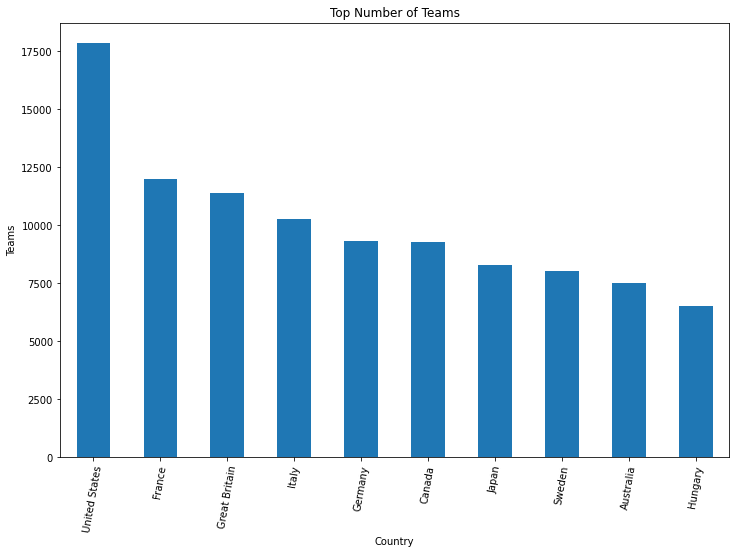

In [24]:
#top 10 teams to have participated in olympics

top_ten=olympics_df.Team.value_counts()
top_ten.head(10).plot(kind="bar",figsize=(12,8))
plt.xticks(rotation=80)
plt.title("Top Number of Teams")
plt.xlabel("Country")
plt.ylabel("Teams")

plt.savefig('outputs/Top 10 Number of Teams.png')
plt.show()

Sport Data

In [28]:
sports_data = country_df.groupby("Sport", as_index=False).agg({
    "Wins" : "sum",
    "Attempts" : "sum",
    "Event" : "nunique",
    "Games" : "nunique",
    "ID" : "nunique",
    "Height" : "mean",
    "Weight" : "mean",
}).sort_values(by = "Wins", ascending= False).rename(columns={"Wins":"Medals"})

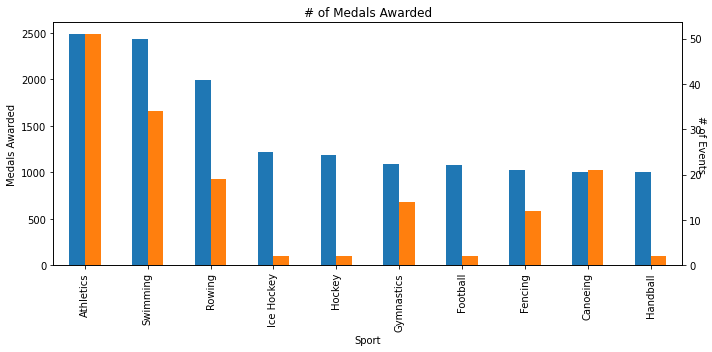

In [29]:
bar_chart_sports = sports_data[["Sport", "Medals", "Event"]]
bar_chart_sports = bar_chart_sports.set_index("Sport")
bar_chart_sports = bar_chart_sports.nlargest(10, "Medals")
bar_chart_sports = bar_chart_sports.sort_values("Medals", ascending=False)
medalsbar_sports = bar_chart_sports.plot(kind="bar", y = ["Medals", "Event"], title=("# of Medals Awarded"), legend = False, secondary_y = "Event", figsize=(10, 5))
medalsbar_sports.set_ylabel("Medals Awarded")
medalsbar_sports.right_ax.set_ylabel("# of Events",rotation = -90)
plt.tight_layout()
plt.savefig("Sports_Bar.png")
plt.show()

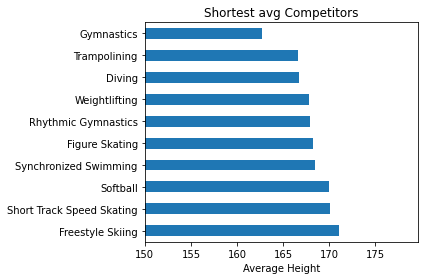

In [30]:
bar_chart_sports = sports_data[["Sport", "Height"]]
bar_chart_sports = bar_chart_sports.set_index("Sport")
bar_chart_sports = bar_chart_sports.nsmallest(10, "Height")
bar_chart_sports = bar_chart_sports.sort_values("Height", ascending=False)
medalsbar_sports = bar_chart_sports.plot(kind="barh", title=("Shortest avg Competitors"), legend = False)
medalsbar_sports.set_ylabel("")
medalsbar_sports.set_xlim(150)
medalsbar_sports.set_xlabel("Average Height")
plt.tight_layout()
plt.savefig("Sports_Bar2.png")
plt.show()

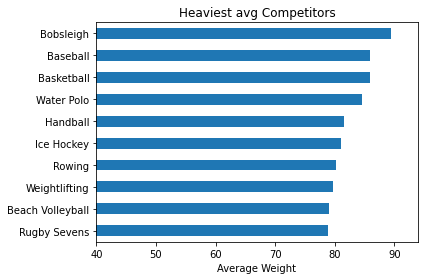

In [31]:
bar_chart_sports = sports_data[["Sport", "Weight"]]
bar_chart_sports = bar_chart_sports.set_index("Sport")
bar_chart_sports = bar_chart_sports.nlargest(10, "Weight")
bar_chart_sports = bar_chart_sports.sort_values("Weight", ascending=True)
medalsbar_sports = bar_chart_sports.plot(kind="barh", title=("Heaviest avg Competitors"), legend = False)
medalsbar_sports.set_ylabel("")
medalsbar_sports.set_xlim(40)
medalsbar_sports.set_xlabel("Average Weight")
plt.tight_layout()
plt.savefig("Sports_Bar3-lrg.png")
plt.show()

Country Data

In [35]:
df_noc = pd.read_csv("datasources/noc_regions.csv")
df_all = pd.read_csv("datasources/athlete_events.csv")
df_all = pd.merge(df_all, df_noc, on = "NOC", how = "left")
df_all = df_all[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games','Year', 'Season', 'City', 'Sport', 'Event', 'Medal', "region"]]
df_all["Medal"] = df_all["Medal"].fillna("No Medal")

#pivot medals and make medal calculations
medals = pd.DataFrame({
    "Medals" : df_all["Medal"]
})

medals = pd.get_dummies(medals)
df_all["Bronze"] = medals["Medals_Bronze"]
df_all["Silver"] = medals["Medals_Silver"]
df_all["Gold"] = medals["Medals_Gold"]
df_all["No Win"] = medals["Medals_No Medal"]
df_all["Attempts"] = df_all["Bronze"] + df_all["Silver"] + df_all["Gold"] + df_all["No Win"]
df_all["Wins"] = df_all["Bronze"] + df_all["Silver"] + df_all["Gold"]

In [37]:
team_group_all = df_all.groupby(by = ["Team", "Games", "Sport", "Event", "region"], as_index= False).agg({
    "Attempts" : "max",
    "Wins" : "max",
    "Bronze" : "max",
    "Silver" : "max",
    "Gold" : "max",
})
country_group_all = team_group_all.groupby(by = "region", as_index= False).agg({
    "Attempts" : "sum",
    "Wins" : "sum",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
}).sort_values("Wins", ascending=False)
country_group_all["Win Rate"] = country_group_all["Wins"] / country_group_all["Attempts"]

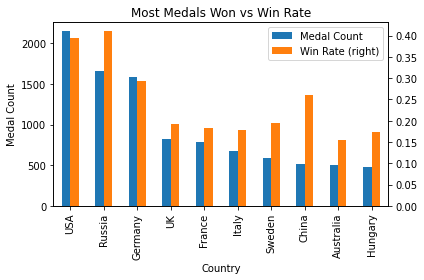

In [38]:
bar_chart = country_group_all[["region", "Wins", "Win Rate"]]
bar_chart = bar_chart.set_index("region")
bar_chart = bar_chart.nlargest(10, "Wins")
bar_chart = bar_chart.rename(columns={"Wins":"Medal Count", "region":"Country"})
bar_chart = bar_chart.sort_values("Medal Count", ascending=False)
medalsbar = bar_chart.plot(kind="bar", secondary_y = "Win Rate", title=("Most Medals Won vs Win Rate"))
medalsbar.set_ylabel("Medal Count")
medalsbar.set_xlabel("Country")
# medalsbar.right_ax.set_ylabel("Medals",rotation = -90)
plt.tight_layout()
plt.savefig("Country_Bar.png")
plt.show()